### This file plots the processed csv files with matplotlib

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [66]:
#date = '2018-11-04_00h57'
date = '2018-12-06_23h08'
worker_list = [8,16,32,64]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/' + date + '/'

## Throughput plot for read loads

In [67]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'one_mw_mem_tp.csv')
df_tp = df_tp[df_tp['client'] <= 192]
df_tp

,client,worker,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,6,8,3499.011111,100.237586,2925.011111,10.742528
1,6,16,3569.150000,18.272156,2893.205556,50.118811
2,6,32,3516.555556,83.613013,2933.000000,1.658368
3,6,64,3527.905556,43.627347,2927.633333,4.029084
4,24,8,6632.764299,95.225312,2937.477413,1.336072
5,24,16,6887.378506,109.986066,2938.284335,2.772343
6,24,32,6653.388889,149.445648,2937.690528,3.328970
7,24,64,6479.555556,122.984188,2939.607741,1.797654
8,48,8,7107.169490,234.368020,2933.278506,0.820676
9,48,16,8096.904918,229.661285,2935.626230,2.696707


In [68]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

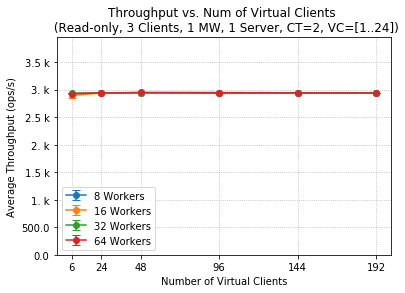

In [69]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..24])")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['read_tp_mean']
    std = df_tp_cut['read_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e3+np.max(df_tp['read_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_mem_tp_read.png", dpi = 150)


## Throughput plot for write loads

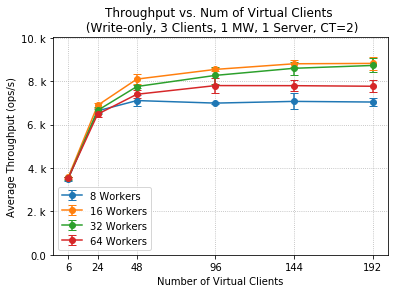

In [77]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_tp_read_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_read_cut['client']
    tps = df_tp_read_cut['write_tp_mean']
    std = df_tp_read_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1.2e3+np.max(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_mem_tp_write.png", dpi = 150)


## Response-time plot for read loads

In [71]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'one_mw_mem_rt.csv')
df_rt = df_rt[df_rt['client'] <= 192]
df_rt

,client,worker,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,6,8,1.712963,0.049045,2.055167,0.028614
1,6,16,1.679130,0.008381,2.582463,0.759185
2,6,32,1.704685,0.040033,2.034389,0.001293
3,6,64,1.698093,0.021570,2.039019,0.004777
4,24,8,3.741051,0.195303,8.532988,0.529752
5,24,16,3.499616,0.050199,8.388444,0.325367
6,24,32,3.616296,0.089112,8.427249,0.229715
7,24,64,3.703537,0.070357,8.299851,0.209804
8,48,8,6.764370,0.227620,16.339278,0.004632
9,48,16,5.932812,0.169065,16.987727,0.402500


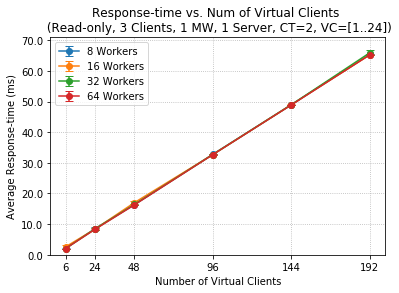

In [72]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..24])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['read_rt_mean']
    std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['read_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_mem_rt_read.png", dpi = 150)


## Response-time plot for write loads

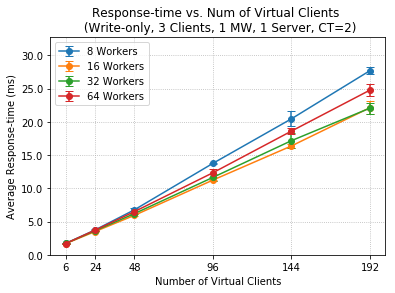

In [78]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_mem_rt_write.png", dpi = 150)
